In [487]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphabase.spectral_library.base import SpecLibBase
from alphadia import data, planning
from alphadia.workflow import manager, peptidecentric

In [488]:
POOL_PROJECTS="/fs/pool/pool-mann-projects/"
POOL_MS="/fs/pool/pool-mann-ms14/"
PROJECT_FOLDER=f"{POOL_PROJECTS}despard/hpo/hpo_mse_2024_07_09/"

RAW_FOLDER = f"{POOL_MS}/Astral4/2024_07/"
LIBRARY_FOLDER=f"{PROJECT_FOLDER}libraries/"
OUTPUT_FOLDER=f"{PROJECT_FOLDER}output/"

In [489]:

MODE = "astral"

if MODE == "astral":
    raw_files = [
        os.path.join(
            RAW_FOLDER,
            "20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03.raw",
        )
    ]
    output_location = os.path.join(OUTPUT_FOLDER, "debugging/")
    os.makedirs(output_location, exist_ok=True)
    fasta_path_list = [os.path.join(LIBRARY_FOLDER, x) for x in ["2024_02_21_human.fasta", "2024_02_21_yeast.fasta", "2024_02_21_ecoli.fasta"]]
elif MODE == "timstof":
    raw_files = [
        os.path.join(
            performance_test_folder,
            "raw_data/timstof_lf_diap/20230502_TIMS05_PaSk_SA_HeLa_21min_diaP_12scans_S2-A3_1_2089.d",
        )
    ]
    output_location = os.path.join(
        performance_test_folder, "outputs/timstof_lf_diaPASEF"
    )
    speclib_path = os.path.join(
        performance_test_folder,
        "libraries/timstof/21min_Evosep_HeLa_BR14_48fractions_diaPASEF_py_diAID_2_egs.hdf",
    )
else:
    raise ValueError("Unknown mode")

In [490]:
config = {
    "general": {
        "reuse_calibration": False,
        "reuse_quant": False,
        "thread_count": 10,
        "astral_ms1": False,
    },
    "search_advanced": {
        "top_k_fragments_scoring": 12,
    },
    "search": {
        "target_num_candidates": 5,
        "target_ms1_tolerance": 0.1 if MODE == "astral" else 15,
        "target_ms2_tolerance": 0.1 if MODE == "astral" else 15,
        "target_rt_tolerance": 1,
        "max_epochs" : 7,
    },
    "fdr": {"classifier": "legacy"},

    "library_prediction": {
      "predict": False,
      "enzyme": 'trypsin',
      "fixed_modifications": 'Carbamidomethyl@C',
      "variable_modifications": 'Oxidation@M;Acetyl@Protein N-term',
      "max_var_mod_num": 1,
      "missed_cleavages": 0,
      "precursor_len": [7, 35],
      "precursor_charge": [2, 4],
      "precursor_mz": [380, 980],
      "fragment_mz": [200, 2000],
      "nce": 25,
      "instrument": 'Lumos',
      "save_hdf": True,
    },
    "search_initial": {
      # Number of peak groups identified in the convolution score to classify with target decoy comeptition
      "initial_num_candidates": 1,
    
      # initial ms1 tolerance in ppm
      "initial_ms1_tolerance": 100,
    
      # initial ms2 tolerance in ppm
      "initial_ms2_tolerance": 100,
    
      # initial retention time tolerance in seconds
      "initial_rt_tolerance": 600,
    },
    "calibration":{
        "recalibration_target" : 50,
        "param_calibration_order" : [['ms2'], ['rt'], ['ms1', 'mobility']],
    }
}

speclib_path = "/fs/pool/pool-mann-projects/despard/hpo/hpo_mse_2024_07_09/output/debugging/speclib.hdf"

In [491]:
#plan = planning.Plan(output_location, raw_files, fasta_path_list=fasta_path_list, config=config)
plan = planning.Plan(output_location, raw_files, speclib_path, config=config)

0:00:00.009110 PROGRESS:           _      _         ___ ___   _   
0:00:00.010467 PROGRESS:      __ _| |_ __| |_  __ _|   \_ _| /_\  
0:00:00.011368 PROGRESS:     / _` | | '_ \ ' \/ _` | |) | | / _ \ 
0:00:00.012297 PROGRESS:     \__,_|_| .__/_||_\__,_|___/___/_/ \_\
0:00:00.013310 PROGRESS:            |_|                           
0:00:00.014166 PROGRESS: 
0:00:00.015152 PROGRESS: version: 1.7.2
0:00:00.015989 PROGRESS: hostname: hpcl8025
0:00:00.016999 PROGRESS: date: 2024-07-18 19:05:50
0:00:00.017824 PROGRESS: =================== Environment ===================
0:00:00.018827 PROGRESS: alphatims       : 1.0.8
0:00:00.019653 PROGRESS: alpharaw        : 0.4.5
0:00:00.020616 PROGRESS: alphabase       : 1.2.5
0:00:00.021144 PROGRESS: alphapeptdeep   : 1.2.1
0:00:00.021659 PROGRESS: directlfq       : 0.2.19
0:00:00.022197 PROGRESS: ===================================================
0:00:00.022822 INFO: loading default config from /fs/gpfs41/lv07/fileset03/home/b_mann/despard/git/alpha

In [492]:
for raw_name, dia_path, speclib in plan.get_run_data():
    pass

0:01:53.123831 PROGRESS: Loading raw file 1/1: 20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03


In [493]:
workflow = peptidecentric.PeptideCentricWorkflow(
    raw_name,
    plan.config,
)


Testing!


In [494]:
workflow.load(dia_path, speclib)

24it [00:27,  1.17s/it]
0:02:26.167259 INFO: Determining DIA cycle
0:02:26.201126 INFO: Found cycle with start 0.00 min and length 151.
0:02:27.244809 INFO: ============ Raw file stats ============
0:02:27.246541 INFO: RT (min)            : 0.0 - 16.2
0:02:27.248096 INFO: RT duration (sec)   : 972.9
0:02:27.248980 INFO: RT duration (min)   : 16.2
0:02:27.249907 INFO: Cycle len (scans)   : 151
0:02:27.250762 INFO: Cycle len (sec)     : 1.23
0:02:27.251473 INFO: Number of cycles    : 787
0:02:27.252264 INFO: MS2 range (m/z)     : 380.4 - 980.7
0:02:27.253050 INFO: ========================================
0:02:28.510992 INFO: Initializing CalibrationManager
0:02:28.513324 INFO: Loading calibration config
0:02:28.514908 INFO: Calibration config: [{'name': 'fragment', 'estimators': [{'name': 'mz', 'model': 'LOESSRegression', 'model_args': {'n_kernels': 2}, 'input_columns': ['mz_library'], 'target_columns': ['mz_observed'], 'output_columns': ['mz_calibrated'], 'transform_deviation': '1e6'}]}

AttributeError: 'PeptideCentricWorkflow' object has no attribute 'initalize_managers'

In [501]:
workflow.initialize_managers()

3:16:16.457690 PROGRESS: Initializing workflow 20240704_OA4_Evo11_16p3min_PaSk_SA_HYE_1002575_200ng_noF_03
3:16:16.460277 INFO: Initializing OptimizationManager
3:16:16.461159 INFO: initial parameter: current_epoch = 0
3:16:16.461925 INFO: initial parameter: current_step = 0
3:16:16.462737 INFO: initial parameter: ms1_error = 100
3:16:16.463462 INFO: initial parameter: ms2_error = 100
3:16:16.464197 INFO: initial parameter: rt_error = 600
3:16:16.464950 INFO: initial parameter: mobility_error = 0.08
3:16:16.465731 INFO: initial parameter: column_type = library
3:16:16.466528 INFO: initial parameter: num_candidates = 1
3:16:16.467291 INFO: initial parameter: recalibration_target = 50
3:16:16.468048 INFO: initial parameter: accumulated_precursors = 0
3:16:16.468807 INFO: initial parameter: accumulated_precursors_01FDR = 0
3:16:16.469512 INFO: initial parameter: accumulated_precursors_001FDR = 0
3:16:16.470209 INFO: initial parameter: fitted_params = []
3:16:16.470929 INFO: initial parame

3:16:19.227463 INFO: Fitting ['ms2'].
3:16:19.229246 INFO: === checking if epoch conditions were reached ===
3:16:19.230723 INFO:  ms2_error      : 100.0000 > 0.1
3:16:19.231737 INFO: ❌ current_epoch  : 0 < 2
3:16:19.232999 INFO: ==============================================
3:16:19.329621 INFO: calibration group: precursor, predicting mz
3:16:19.331255 WARNING: mz prediction was skipped as it has not been fitted yet
3:16:19.332095 INFO: calibration group: precursor, predicting rt
3:16:19.333099 WARNING: rt prediction was skipped as it has not been fitted yet
3:16:19.333908 INFO: calibration group: fragment, predicting mz
3:16:28.564398 PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 8000 ===
3:16:28.613668 PROGRESS: Extracting batch of 15809 precursors
3:16:28.621118 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:16:28.622249 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:16:28.623002 INFO: FWHM in RT is 2.23 seconds, sigma is 0.38


Using base classifier


100%|██████████| 150/150 [00:00<00:00, 3654.49it/s]
3:16:40.512785 INFO: Test AUC: 0.515
3:16:40.514091 INFO: Train AUC: 0.545
3:16:40.515067 INFO: AUC difference: 5.55%
3:16:40.515905 WARNING: AUC difference > 5%. This may indicate overfitting.


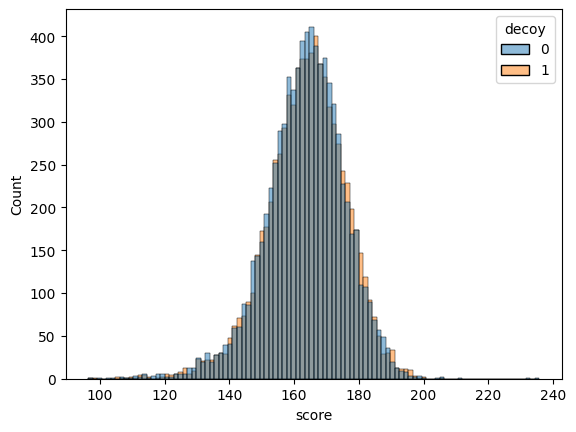

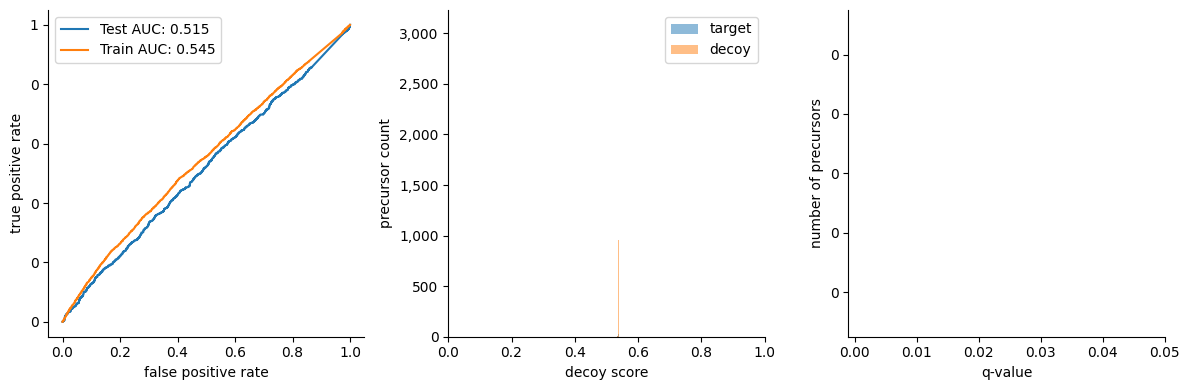

3:16:41.136023 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:16:41.141206 PROGRESS: ============================= Precursor FDR =============================
3:16:41.142737 PROGRESS: Total precursors accumulated: 7,984
3:16:41.144149 PROGRESS: Target precursors: 4,463 (55.90%)
3:16:41.145136 PROGRESS: Decoy precursors: 3,521 (44.10%)
3:16:41.146259 PROGRESS: 
3:16:41.147228 PROGRESS: Precursor Summary:
3:16:41.150366 PROGRESS: Channel   0:	 0.05 FDR:     0; 0.01 FDR:     0; 0.001 FDR:     0
3:16:41.151603 PROGRESS: 
3:16:41.152528 PROGRESS: Protein Summary:
3:16:41.155644 PROGRESS: Channel   0:	 0.05 FDR:     0; 0.01 FDR:     0; 0.001 FDR:     0
3:16:41.156563 PROGRESS: =========================================================================
3:16:41.158357 PROGRESS: === Epoch 0, step 1, extracting elution groups 8000 to 24000 ===
3:16:41.214841 PROGRESS: Extracting batch of 31704 precursors
3:16:41.228939 INFO: Duty cycle consists of 151 f

Storing classifier: 1dbbc056e05895b0


100%|██████████| 31704/31704 [00:13<00:00, 2312.09it/s]
3:16:56.798938 INFO: Starting candidate scoring
100%|██████████| 31704/31704 [00:01<00:00, 29163.09it/s]
3:16:58.569822 INFO: Finished candidate processing
3:16:58.572209 INFO: Collecting candidate features
3:16:59.590884 INFO: Collecting fragment features
3:16:59.870743 INFO: Finished candidate scoring
3:17:00.036649 PROGRESS: === Epoch 0, step 1, extracted 31704 precursors and 364161 fragments ===
3:17:00.038490 INFO: performing precursor FDR with 47 features
3:17:00.039766 INFO: Decoy channel: -1
3:17:00.040995 INFO: Competetive: True


Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 558.86it/s]
3:17:01.284706 INFO: Test AUC: 0.578
3:17:01.286091 INFO: Train AUC: 0.573
3:17:01.287097 INFO: AUC difference: 1.00%


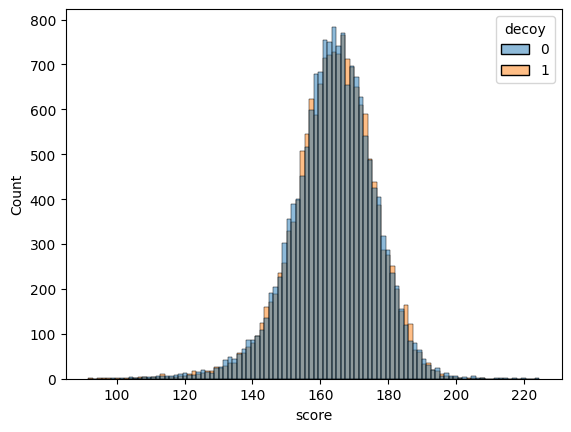

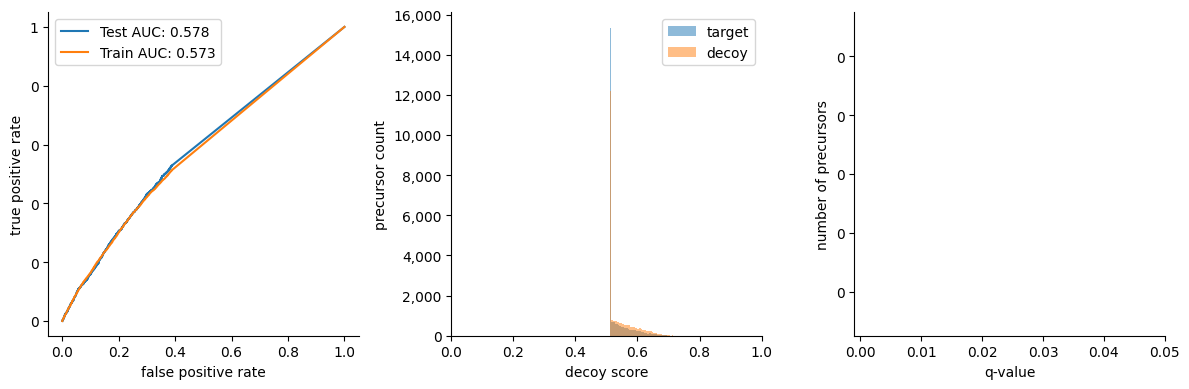

3:17:01.929806 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:17:01.943153 PROGRESS: ============================= Precursor FDR =============================
3:17:01.945101 PROGRESS: Total precursors accumulated: 23,771
3:17:01.946645 PROGRESS: Target precursors: 14,290 (60.12%)
3:17:01.948030 PROGRESS: Decoy precursors: 9,481 (39.88%)
3:17:01.949649 PROGRESS: 
3:17:01.951414 PROGRESS: Precursor Summary:
3:17:01.955285 PROGRESS: Channel   0:	 0.05 FDR:     0; 0.01 FDR:     0; 0.001 FDR:     0
3:17:01.956783 PROGRESS: 
3:17:01.957956 PROGRESS: Protein Summary:
3:17:01.961758 PROGRESS: Channel   0:	 0.05 FDR:     0; 0.01 FDR:     0; 0.001 FDR:     0
3:17:01.963171 PROGRESS: =========================================================================
3:17:01.965713 PROGRESS: === Epoch 0, step 2, extracting elution groups 24000 to 56000 ===
3:17:02.064132 PROGRESS: Extracting batch of 63393 precursors
3:17:02.095494 INFO: Duty cycle consists of 15

Storing classifier: 1dbbc056e05895b0


100%|██████████| 63393/63393 [00:27<00:00, 2343.82it/s]
3:17:31.063973 INFO: Starting candidate scoring
100%|██████████| 63393/63393 [00:02<00:00, 29177.12it/s]
3:17:33.974022 INFO: Finished candidate processing
3:17:33.975903 INFO: Collecting candidate features
3:17:35.112204 INFO: Collecting fragment features
3:17:35.451905 INFO: Finished candidate scoring
3:17:35.681342 PROGRESS: === Epoch 0, step 2, extracted 63393 precursors and 728669 fragments ===
3:17:35.683758 INFO: performing precursor FDR with 47 features
3:17:35.684562 INFO: Decoy channel: -1
3:17:35.685252 INFO: Competetive: True


Using classifier: 1dbbc056e05895b0


100%|██████████| 16/16 [00:00<00:00, 322638.77it/s]
3:17:37.556038 INFO: Test AUC: 0.590
3:17:37.557245 INFO: Train AUC: 0.592
3:17:37.558265 INFO: AUC difference: 0.42%


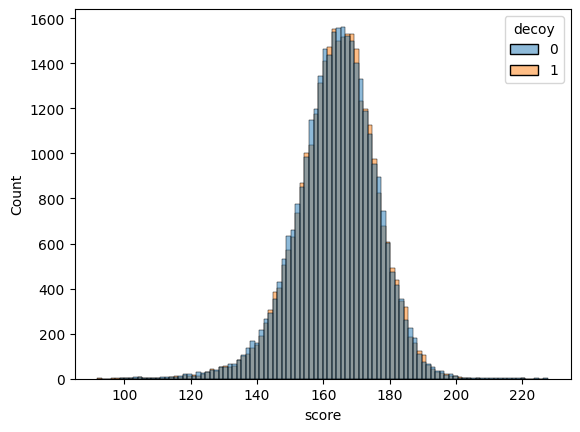

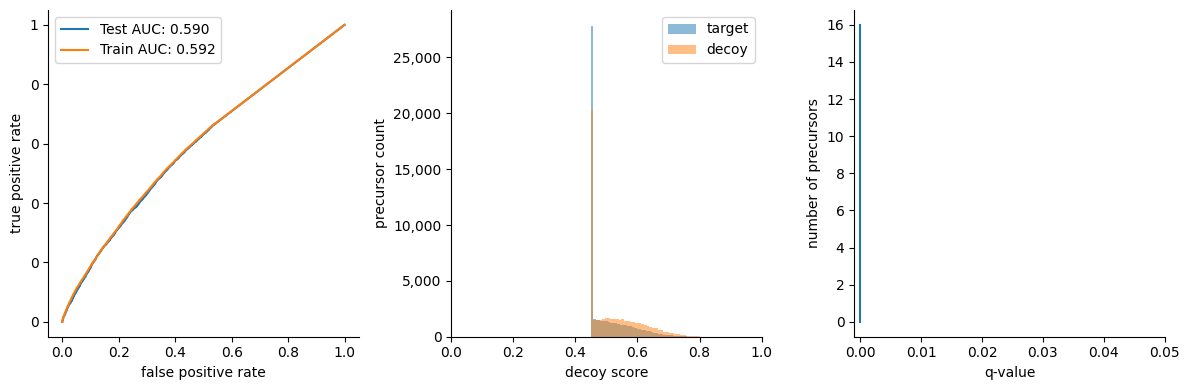

3:17:40.323969 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:17:40.326915 PROGRESS: ============================= Precursor FDR =============================
3:17:40.328021 PROGRESS: Total precursors accumulated: 18
3:17:40.329469 PROGRESS: Target precursors: 17 (94.44%)
3:17:40.330499 PROGRESS: Decoy precursors: 1 (5.56%)
3:17:40.331772 PROGRESS: 
3:17:40.333096 PROGRESS: Precursor Summary:
3:17:40.336673 PROGRESS: Channel   0:	 0.05 FDR:    17; 0.01 FDR:    17; 0.001 FDR:    17
3:17:40.337833 PROGRESS: 
3:17:40.338700 PROGRESS: Protein Summary:
3:17:40.341732 PROGRESS: Channel   0:	 0.05 FDR:    16; 0.01 FDR:    16; 0.001 FDR:    16
3:17:40.342619 PROGRESS: =========================================================================
3:17:40.344652 PROGRESS: === Epoch 0, step 3, extracting elution groups 56000 to 120000 ===
3:17:40.462739 PROGRESS: Extracting batch of 126750 precursors
3:17:40.517771 INFO: Duty cycle consists of 151 frames, 1

Storing classifier: 1dbbc056e05895b0


100%|██████████| 126750/126750 [00:54<00:00, 2317.44it/s]
3:18:37.159821 INFO: Starting candidate scoring
100%|██████████| 126750/126750 [00:04<00:00, 29547.14it/s]
3:18:42.307762 INFO: Finished candidate processing
3:18:42.309323 INFO: Collecting candidate features
3:18:43.728218 INFO: Collecting fragment features
3:18:44.185482 INFO: Finished candidate scoring
3:18:44.557635 PROGRESS: === Epoch 0, step 3, extracted 126750 precursors and 1456902 fragments ===
3:18:44.560415 INFO: performing precursor FDR with 47 features
3:18:44.561241 INFO: Decoy channel: -1
3:18:44.562015 INFO: Competetive: True


Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 14411.76it/s]
3:18:49.024128 INFO: Test AUC: 0.596
3:18:49.025369 INFO: Train AUC: 0.608
3:18:49.026243 INFO: AUC difference: 1.91%


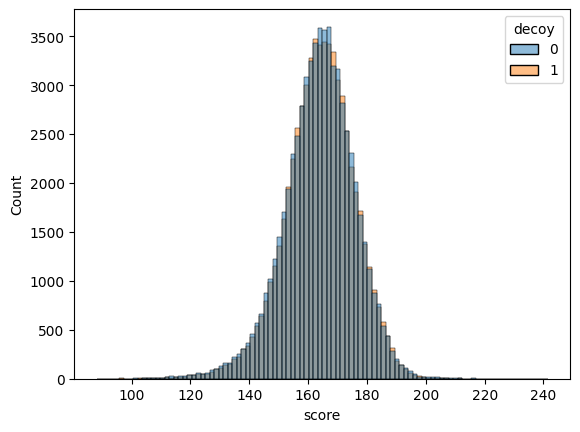

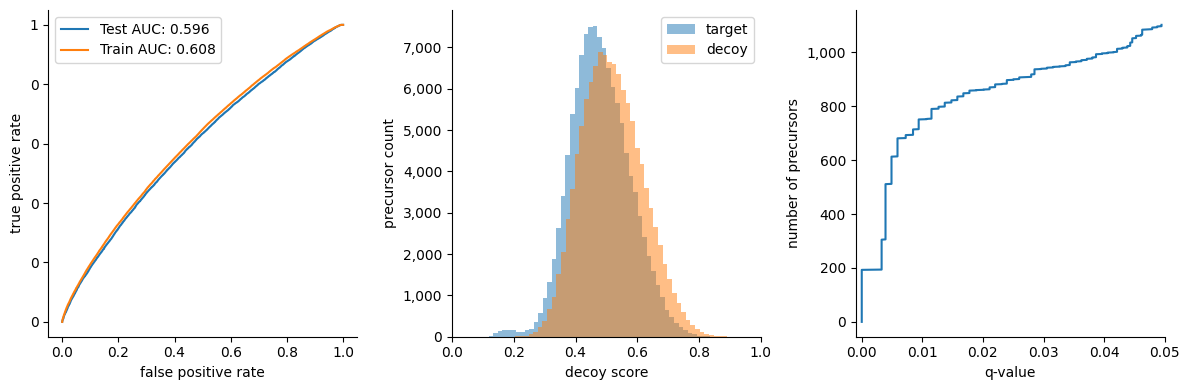

3:18:49.747630 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:18:49.751068 PROGRESS: ============================= Precursor FDR =============================
3:18:49.752412 PROGRESS: Total precursors accumulated: 1,422
3:18:49.753738 PROGRESS: Target precursors: 1,296 (91.14%)
3:18:49.755007 PROGRESS: Decoy precursors: 126 (8.86%)
3:18:49.756327 PROGRESS: 
3:18:49.757518 PROGRESS: Precursor Summary:
3:18:49.761324 PROGRESS: Channel   0:	 0.05 FDR: 1,051; 0.01 FDR:   745; 0.001 FDR:   194
3:18:49.762305 PROGRESS: 
3:18:49.763231 PROGRESS: Protein Summary:
3:18:49.767231 PROGRESS: Channel   0:	 0.05 FDR:   855; 0.01 FDR:   606; 0.001 FDR:   175
3:18:49.768183 PROGRESS: =========================================================================
3:18:49.797997 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 1dbbc056e05895b0
fragments_df_filtered: 500


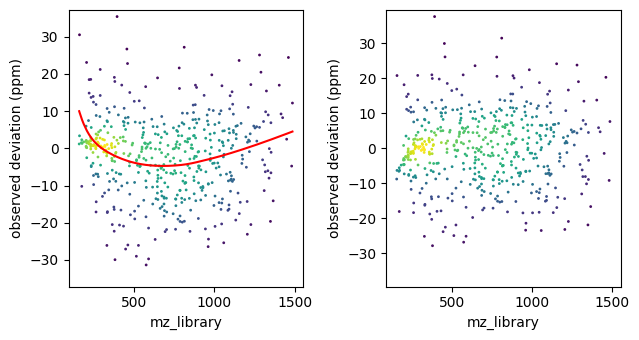

3:18:50.033857 INFO: === checking if epoch conditions were reached ===
3:18:50.035152 INFO:  ms2_error      : 29.3069 > 0.1
3:18:50.036609 INFO: ❌ current_epoch  : 0 < 2
3:18:50.038107 INFO: ==============================================
3:18:50.039488 PROGRESS: Calibration dataframe has been frozen.
3:18:50.040698 INFO: calibration group: precursor, predicting mz
3:18:50.041867 WARNING: mz prediction was skipped as it has not been fitted yet
3:18:50.042520 INFO: calibration group: precursor, predicting rt
3:18:50.043833 WARNING: rt prediction was skipped as it has not been fitted yet
3:18:50.044463 INFO: calibration group: fragment, predicting mz


score cutoff 120.57305981445313


3:18:59.617182 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 120000 ===
3:18:59.790819 PROGRESS: Extracting batch of 237656 precursors
3:18:59.876099 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:18:59.877383 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:18:59.878302 INFO: FWHM in RT is 2.57 seconds, sigma is 0.44
3:18:59.879066 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:18:59.880503 INFO: Starting candidate selection
100%|██████████| 237656/237656 [01:42<00:00, 2324.39it/s]
3:20:44.777314 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [00:39<00:00, 25.31it/s]
3:21:27.243657 INFO: Finished candidate processing
3:21:27.245882 INFO: Collecting candidate features
3:21:31.813768 INFO: Collecting fragment features
3:21:34.207301 INFO: Finished candidate scoring
3:21:35.635853 PROGRESS: === Epoch 1, step 0, extracted 1188280 precursors and 13422297 fragments ===
3:21:35.638714 INFO: performing precursor FDR with

Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 7244.88it/s]
3:21:58.179963 INFO: Test AUC: 0.591
3:21:58.181239 INFO: Train AUC: 0.597
3:21:58.182074 INFO: AUC difference: 1.04%


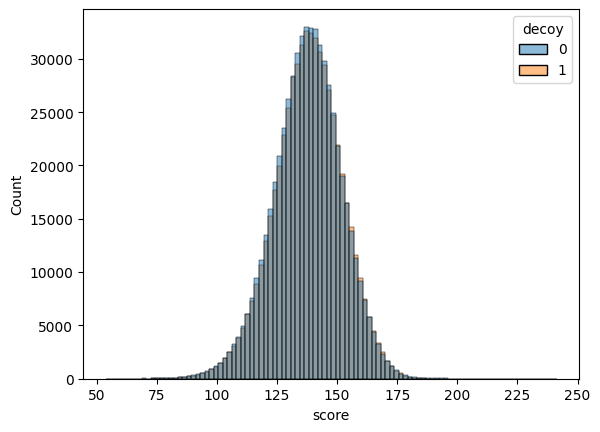

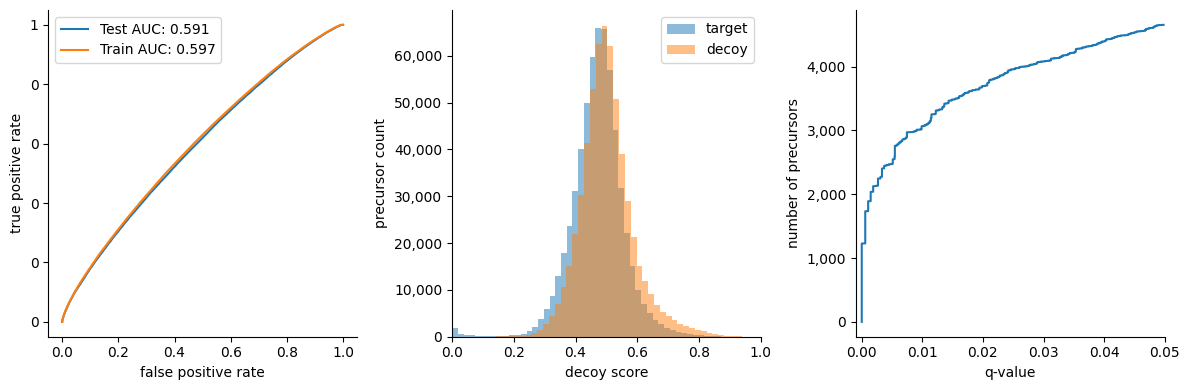

3:21:59.266425 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:21:59.271281 PROGRESS: ============================= Precursor FDR =============================
3:21:59.272574 PROGRESS: Total precursors accumulated: 5,660
3:21:59.274138 PROGRESS: Target precursors: 5,182 (91.55%)
3:21:59.275143 PROGRESS: Decoy precursors: 478 (8.45%)
3:21:59.276327 PROGRESS: 
3:21:59.277458 PROGRESS: Precursor Summary:
3:21:59.283415 PROGRESS: Channel   0:	 0.05 FDR: 4,436; 0.01 FDR: 3,037; 0.001 FDR: 1,734
3:21:59.284418 PROGRESS: 
3:21:59.285353 PROGRESS: Protein Summary:
3:21:59.291838 PROGRESS: Channel   0:	 0.05 FDR: 3,001; 0.01 FDR: 2,107; 0.001 FDR: 1,315
3:21:59.292773 PROGRESS: =========================================================================
3:21:59.436541 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 03a2f02d595f0537
fragments_df_filtered: 5000


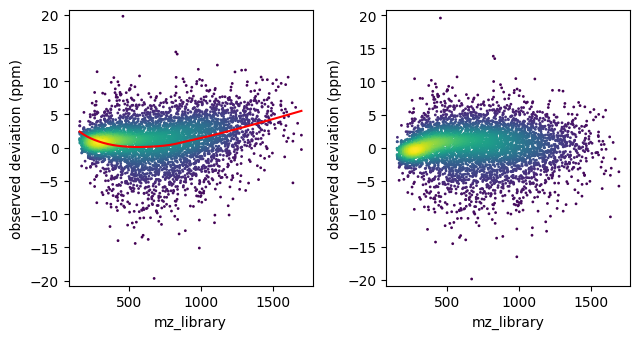

3:22:00.417814 INFO: === checking if epoch conditions were reached ===
3:22:00.419211 INFO:  ms2_error      : 10.5499 > 0.1
3:22:00.420225 INFO: ❌ current_epoch  : 1 < 2
3:22:00.421157 INFO: ==============================================
3:22:00.422149 INFO: calibration group: precursor, predicting mz
3:22:00.423096 WARNING: mz prediction was skipped as it has not been fitted yet
3:22:00.423686 INFO: calibration group: precursor, predicting rt
3:22:00.424785 WARNING: rt prediction was skipped as it has not been fitted yet
3:22:00.425319 INFO: calibration group: fragment, predicting mz


score cutoff 98.1509697265625


3:22:09.556702 PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 120000 ===
3:22:09.721716 PROGRESS: Extracting batch of 237656 precursors
3:22:09.809600 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:22:09.810905 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:22:09.811750 INFO: FWHM in RT is 2.58 seconds, sigma is 0.44
3:22:09.812505 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:22:09.813679 INFO: Starting candidate selection
100%|██████████| 237656/237656 [01:39<00:00, 2394.45it/s]
3:23:51.727857 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [00:35<00:00, 27.87it/s]
3:24:30.568784 INFO: Finished candidate processing
3:24:30.571409 INFO: Collecting candidate features
3:24:35.195854 INFO: Collecting fragment features
3:24:37.506374 INFO: Finished candidate scoring
3:24:38.962522 PROGRESS: === Epoch 2, step 0, extracted 1188279 precursors and 12132108 fragments ===
3:24:38.965155 INFO: performing precursor FDR with

Using classifier: 1dbbc056e05895b0


100%|██████████| 150/150 [00:00<00:00, 4851.11it/s]
3:25:03.301914 INFO: Test AUC: 0.589
3:25:03.303218 INFO: Train AUC: 0.598
3:25:03.304068 INFO: AUC difference: 1.43%


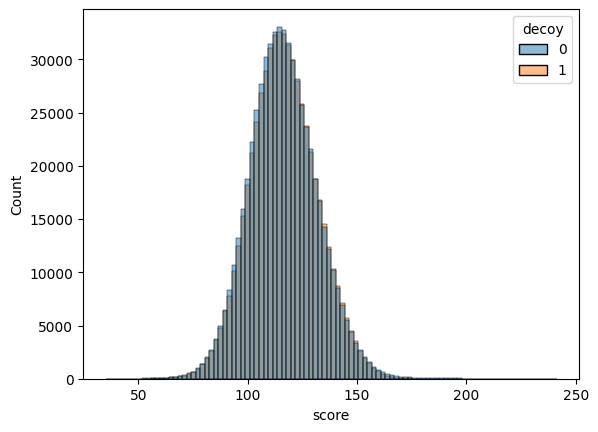

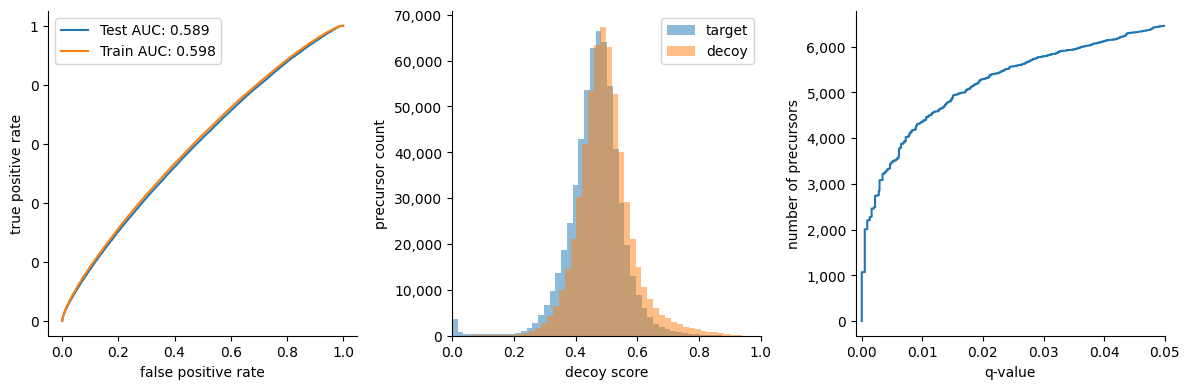

3:25:04.472306 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:25:04.477588 PROGRESS: ============================= Precursor FDR =============================
3:25:04.479110 PROGRESS: Total precursors accumulated: 7,704
3:25:04.480390 PROGRESS: Target precursors: 7,075 (91.84%)
3:25:04.481626 PROGRESS: Decoy precursors: 629 (8.16%)
3:25:04.482997 PROGRESS: 
3:25:04.484205 PROGRESS: Precursor Summary:
3:25:04.490556 PROGRESS: Channel   0:	 0.05 FDR: 6,150; 0.01 FDR: 4,317; 0.001 FDR: 2,200
3:25:04.491627 PROGRESS: 
3:25:04.492651 PROGRESS: Protein Summary:
3:25:04.500588 PROGRESS: Channel   0:	 0.05 FDR: 3,937; 0.01 FDR: 2,857; 0.001 FDR: 1,600
3:25:04.501765 PROGRESS: =========================================================================
3:25:04.621949 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 48aa7ecdb550b9c3
fragments_df_filtered: 5000


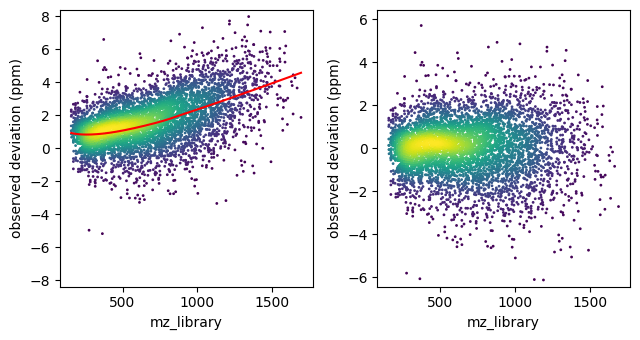

3:25:05.619838 INFO: === checking if epoch conditions were reached ===
3:25:05.621241 INFO:  ms2_error      : 4.1432 > 0.1
3:25:05.622633 INFO: ✅ current_epoch  : 2 >= 2
3:25:05.623884 INFO: ==============================================
3:25:05.625180 INFO: calibration group: precursor, predicting mz
3:25:05.626574 WARNING: mz prediction was skipped as it has not been fitted yet
3:25:05.627348 INFO: calibration group: precursor, predicting rt
3:25:05.628712 WARNING: rt prediction was skipped as it has not been fitted yet
3:25:05.629460 INFO: calibration group: fragment, predicting mz


score cutoff 92.56977102661133


3:25:14.832580 PROGRESS: === Epoch 3, step 0, extracting elution groups 0 to 120000 ===
3:25:15.000135 PROGRESS: Extracting batch of 237656 precursors
3:25:15.087597 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:25:15.088887 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:25:15.089940 INFO: FWHM in RT is 2.47 seconds, sigma is 0.42
3:25:15.090781 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:25:15.091940 INFO: Starting candidate selection
100%|██████████| 237656/237656 [01:38<00:00, 2413.11it/s]
3:26:56.250807 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [00:30<00:00, 33.27it/s]
3:27:29.121147 INFO: Finished candidate processing
3:27:29.123765 INFO: Collecting candidate features
3:27:33.558458 WARNING: intensity_correlation has 3 NaNs ( 0.00 % out of 1188218)
3:27:33.664739 INFO: Collecting fragment features
3:27:35.751771 INFO: Finished candidate scoring
3:27:37.118894 PROGRESS: === Epoch 3, step 0, extracted 1188218 precur

Using classifier: 1dbbc056e05895b0


3:27:38.393538 WARNING: dropped 1 target PSMs due to missing features
3:27:38.394872 WARNING: dropped 2 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 7256.83it/s]
3:28:01.536487 INFO: Test AUC: 0.591
3:28:01.537821 INFO: Train AUC: 0.597
3:28:01.538762 INFO: AUC difference: 1.07%


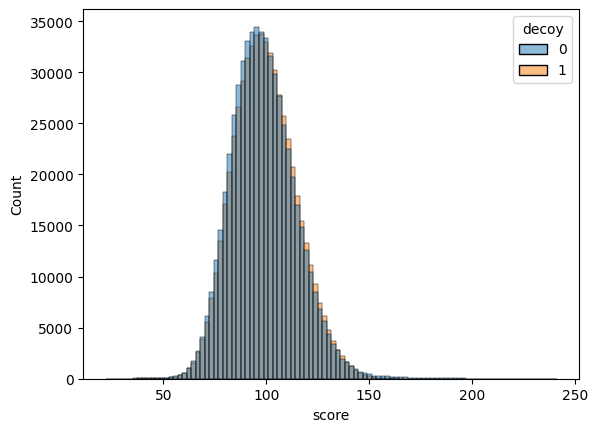

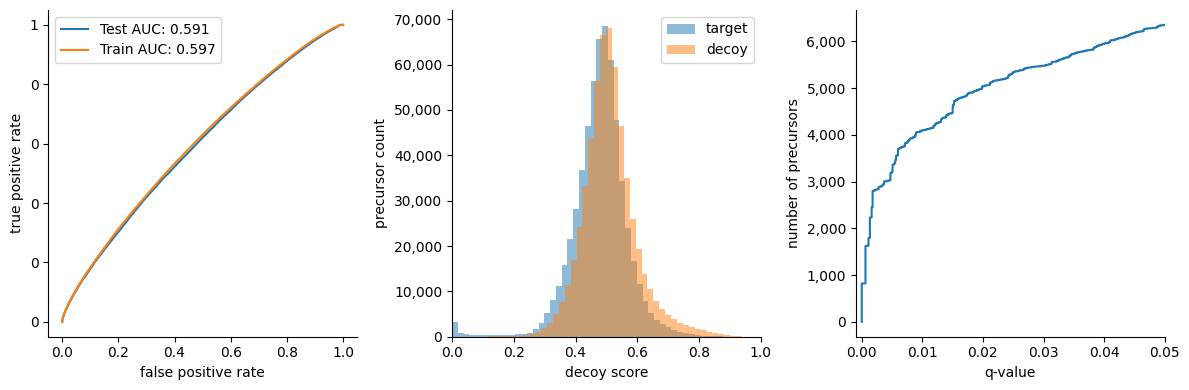

3:28:02.692379 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:28:02.697651 PROGRESS: ============================= Precursor FDR =============================
3:28:02.699194 PROGRESS: Total precursors accumulated: 7,733
3:28:02.700520 PROGRESS: Target precursors: 7,088 (91.66%)
3:28:02.701746 PROGRESS: Decoy precursors: 645 (8.34%)
3:28:02.702951 PROGRESS: 
3:28:02.704207 PROGRESS: Precursor Summary:
3:28:02.710223 PROGRESS: Channel   0:	 0.05 FDR: 6,051; 0.01 FDR: 4,053; 0.001 FDR: 1,624
3:28:02.711390 PROGRESS: 
3:28:02.712471 PROGRESS: Protein Summary:
3:28:02.720255 PROGRESS: Channel   0:	 0.05 FDR: 3,888; 0.01 FDR: 2,697; 0.001 FDR: 1,248
3:28:02.721471 PROGRESS: =========================================================================
3:28:02.821275 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 6bdd73c377b402e5
fragments_df_filtered: 5000


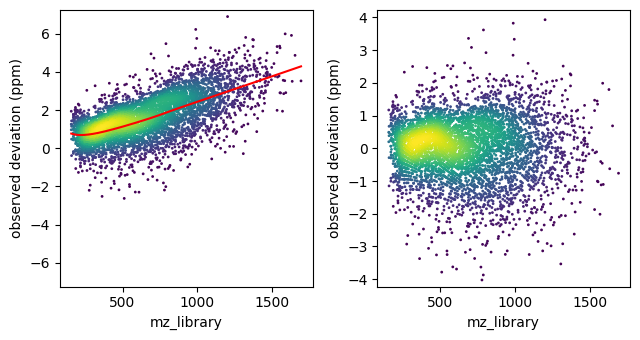

3:28:03.823303 INFO: === checking if epoch conditions were reached ===
3:28:03.825010 INFO:  ms2_error      : 2.8271 > 0.1
3:28:03.826484 INFO: ✅ current_epoch  : 3 >= 2
3:28:03.827760 INFO: ==============================================
3:28:03.829007 INFO: calibration group: precursor, predicting mz
3:28:03.830392 WARNING: mz prediction was skipped as it has not been fitted yet
3:28:03.831032 INFO: calibration group: precursor, predicting rt
3:28:03.832254 WARNING: rt prediction was skipped as it has not been fitted yet
3:28:03.832799 INFO: calibration group: fragment, predicting mz


score cutoff 76.55836901855469


3:28:13.159039 PROGRESS: === Epoch 4, step 0, extracting elution groups 0 to 120000 ===
3:28:13.326986 PROGRESS: Extracting batch of 237656 precursors
3:28:13.414752 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:28:13.416061 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:28:13.416957 INFO: FWHM in RT is 2.30 seconds, sigma is 0.40
3:28:13.417732 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:28:13.419033 INFO: Starting candidate selection
100%|██████████| 237656/237656 [01:38<00:00, 2423.26it/s]
3:29:54.132545 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [00:27<00:00, 36.41it/s]
3:30:24.340566 INFO: Finished candidate processing
3:30:24.343253 INFO: Collecting candidate features
3:30:28.769837 WARNING: intensity_correlation has 1047 NaNs ( 0.09 % out of 1185687)
3:30:28.878724 INFO: Collecting fragment features
3:30:30.641973 INFO: Finished candidate scoring
3:30:31.978929 PROGRESS: === Epoch 4, step 0, extracted 1185687 pre

Using classifier: 1dbbc056e05895b0


3:30:33.264026 WARNING: dropped 544 target PSMs due to missing features
3:30:33.265358 WARNING: dropped 503 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 7224.83it/s]
3:30:56.122987 INFO: Test AUC: 0.591
3:30:56.124314 INFO: Train AUC: 0.595
3:30:56.125236 INFO: AUC difference: 0.65%


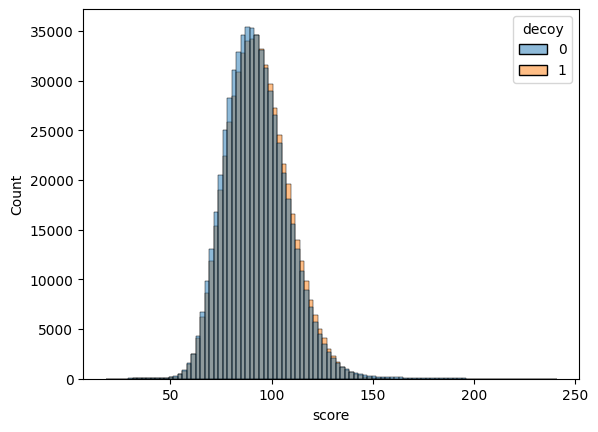

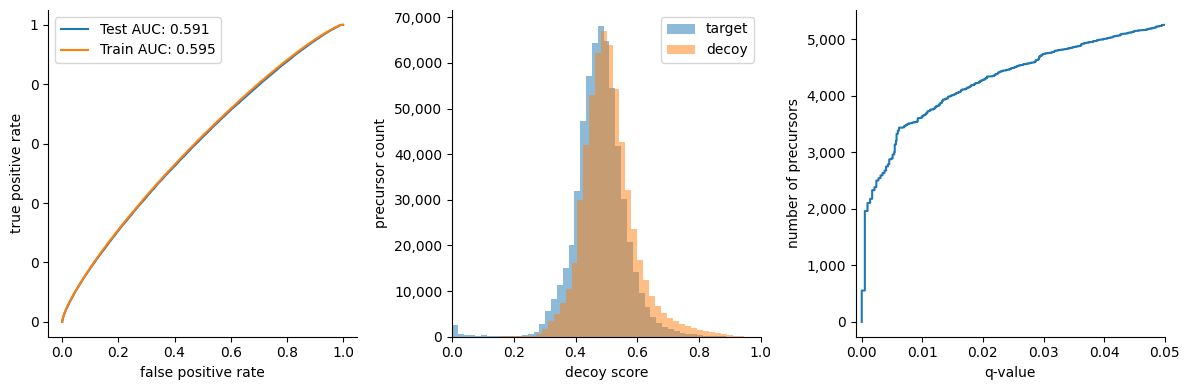

3:30:57.273363 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:30:57.278319 PROGRESS: ============================= Precursor FDR =============================
3:30:57.280007 PROGRESS: Total precursors accumulated: 6,411
3:30:57.281267 PROGRESS: Target precursors: 5,884 (91.78%)
3:30:57.285630 PROGRESS: Decoy precursors: 527 (8.22%)
3:30:57.286894 PROGRESS: 
3:30:57.288011 PROGRESS: Precursor Summary:
3:30:57.294604 PROGRESS: Channel   0:	 0.05 FDR: 5,006; 0.01 FDR: 3,607; 0.001 FDR: 2,103
3:30:57.296100 PROGRESS: 
3:30:57.297364 PROGRESS: Protein Summary:
3:30:57.305107 PROGRESS: Channel   0:	 0.05 FDR: 3,308; 0.01 FDR: 2,466; 0.001 FDR: 1,557
3:30:57.306640 PROGRESS: =========================================================================
3:30:57.381702 INFO: calibration group: fragment, fitting mz estimator 


Storing classifier: 9ac56118ad360ae9
fragments_df_filtered: 5000


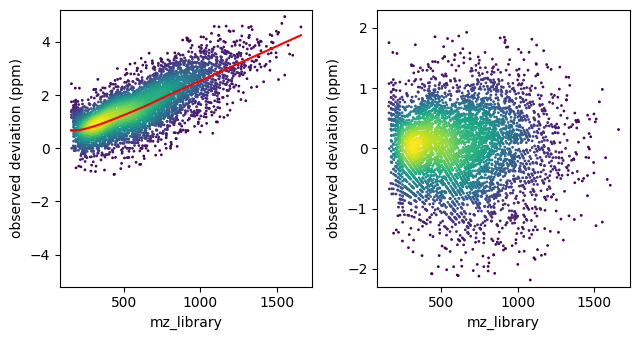

3:30:58.370385 INFO: === checking if epoch conditions were reached ===
3:30:58.371810 INFO:  ms2_error      : 1.8421 > 0.1
3:30:58.372816 INFO: ✅ current_epoch  : 4 >= 2
3:30:58.374051 INFO: ==============================================
3:30:58.456330 PROGRESS: Optimal values for ['ms2'] is/are {'ms2': 0            486.240051
1            261.127045
2            824.437805
3            412.722412
4            360.195343
               ...     
41372560    1005.527344
41372561     732.373291
41372562     788.915527
41372563    1301.713989
41372564     651.358765
Name: mz_calibrated, Length: 41372565, dtype: float32, 'rt': 0          371.788025
1          371.788025
2          381.919891
3          381.919891
4          483.009369
              ...    
3517492    482.862366
3517493    637.746338
3517494    637.746338
3517495    595.482239
3517496    595.482239
Name: rt_library, Length: 3481959, dtype: float32, 'ms1': 0          508.790375
1          542.782043
2          534.784546
3   

score cutoff 83.34846012878418


3:31:07.922019 PROGRESS: === Epoch 0, step 0, extracting elution groups 0 to 120000 ===
3:31:08.095119 PROGRESS: Extracting batch of 237656 precursors
3:31:08.183342 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:31:08.184672 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:31:08.185562 INFO: FWHM in RT is 2.10 seconds, sigma is 0.36
3:31:08.186364 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:31:08.187902 INFO: Starting candidate selection
100%|██████████| 237656/237656 [01:36<00:00, 2463.72it/s]
3:32:47.312965 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [00:26<00:00, 38.01it/s]
3:33:16.322317 INFO: Finished candidate processing
3:33:16.324218 INFO: Collecting candidate features
3:33:20.665903 WARNING: intensity_correlation has 7920 NaNs ( 0.68 % out of 1159850)
3:33:20.767522 INFO: Collecting fragment features
3:33:22.241647 INFO: Finished candidate scoring
3:33:23.562050 PROGRESS: === Epoch 0, step 0, extracted 1159850 pre

Using classifier: 48aa7ecdb550b9c3


3:33:24.792338 WARNING: dropped 4178 target PSMs due to missing features
3:33:24.793641 WARNING: dropped 3742 decoy PSMs due to missing features
100%|██████████| 150/150 [00:00<00:00, 7232.22it/s]
3:33:45.547800 INFO: Test AUC: 0.590
3:33:45.549089 INFO: Train AUC: 0.596
3:33:45.550030 INFO: AUC difference: 0.95%


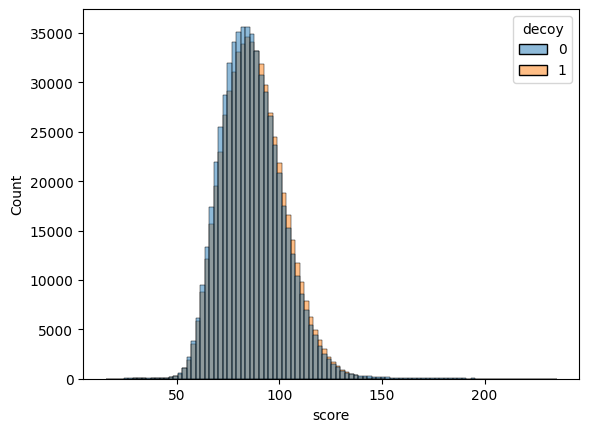

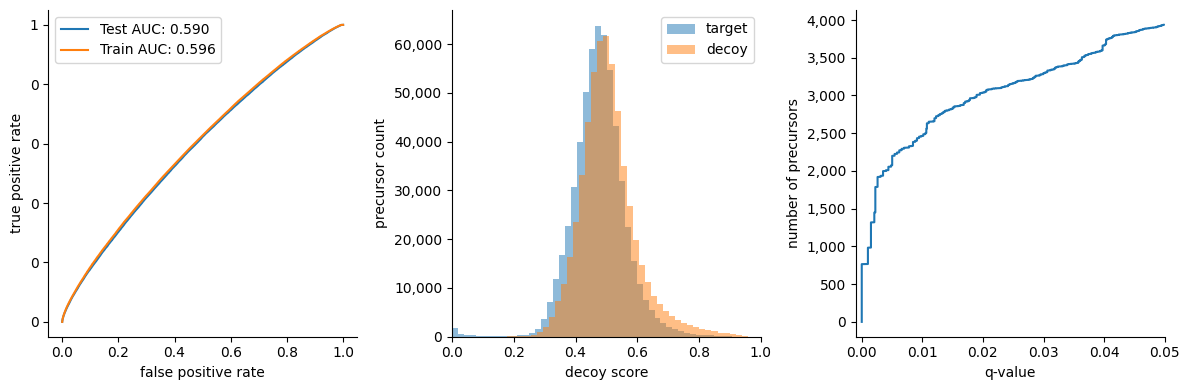

3:33:46.619473 PROGRESS: === checking if recalibration conditions were reached, target 50 precursors ===
3:33:46.623788 PROGRESS: ============================= Precursor FDR =============================
3:33:46.625122 PROGRESS: Total precursors accumulated: 4,855
3:33:46.626536 PROGRESS: Target precursors: 4,452 (91.70%)
3:33:46.627935 PROGRESS: Decoy precursors: 403 (8.30%)
3:33:46.629014 PROGRESS: 
3:33:46.630291 PROGRESS: Precursor Summary:
3:33:46.635827 PROGRESS: Channel   0:	 0.05 FDR: 3,750; 0.01 FDR: 2,440; 0.001 FDR:   766
3:33:46.637076 PROGRESS: 
3:33:46.638210 PROGRESS: Protein Summary:
3:33:46.643916 PROGRESS: Channel   0:	 0.05 FDR: 2,644; 0.01 FDR: 1,790; 0.001 FDR:   647
3:33:46.644885 PROGRESS: =========================================================================
3:33:46.650018 INFO: calibration group: precursor, fitting rt estimator 


Storing classifier: aa8ddcf2c1f86174


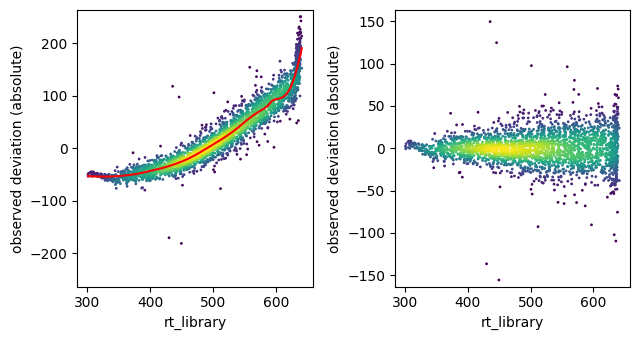

3:33:47.162912 INFO: === checking if epoch conditions were reached ===
3:33:47.165153 INFO:  rt_error       : 65.4226 > 1
3:33:47.166903 INFO: ❌ current_epoch  : 0 < 2
3:33:47.168556 INFO: ==============================================
3:33:47.170349 INFO: calibration group: precursor, predicting mz
3:33:47.171955 WARNING: mz prediction was skipped as it has not been fitted yet
3:33:47.172983 INFO: calibration group: precursor, predicting rt


score cutoff 79.49099281311035


3:33:50.522683 INFO: calibration group: fragment, predicting mz
3:33:59.960949 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 120000 ===
3:34:00.135840 PROGRESS: Extracting batch of 237656 precursors
3:34:00.226510 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
3:34:00.227737 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
3:34:00.228580 INFO: FWHM in RT is 1.77 seconds, sigma is 0.30
3:34:00.229339 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
3:34:00.230560 INFO: Starting candidate selection
100%|██████████| 237656/237656 [00:17<00:00, 13271.34it/s]
3:34:20.806974 INFO: Starting candidate scoring
 64%|██████▍   | 642/1000 [00:15<00:08, 41.43it/s]

In [ ]:
workflow.calibration(param_calibration_order = [['ms2'], ['rt'], ['ms1', 'mobility']])

In [94]:
workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch]['rt']

KeyError: -1

In [77]:
workflow.com.ms2_list[:6]

[100,
 36.073153281147334,
 14.299347878654645,
 5.465135041503158,
 3.425225098119014,
 2.5477041835016077]

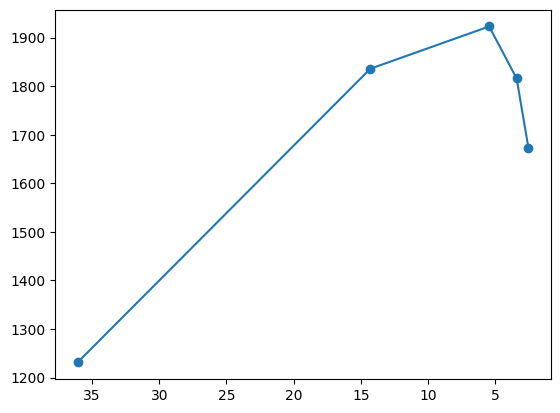

In [91]:
fig, ax = plt.subplots()
ax.plot(workflow.com.ms2_list[1:6], workflow.com.precursor_number[1:6], linestyle='-')
ax.scatter(workflow.com.ms2_list[1:6], workflow.com.precursor_number[1:6])
ax.invert_xaxis()
plt.savefig("debugging_files/ms2_plot.png", dpi=300)
plt.show()

In [79]:
workflow.com.precursor_number

[210, 1231, 1836, 1923, 1816, 1673, 1955, 1910, 1846]

In [62]:
np.argmax([workflow.com.precursor_proportion[-2], workflow.com.precursor_proportion[-3]])

0

In [59]:
np.asarray([-1, 0], dtype=str)

array(['-1', '0'], dtype='<U2')

In [448]:
workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch-2]


KeyError: 3

In [444]:
param='ms2'

workflow.spectral_library.fragment_df[f"{workflow.com.param_colname_dict[param]}_calibrated"] = workflow.com.calibrations[workflow.param_index][workflow.com.current_epoch-2][param]




KeyError: 3

In [430]:
workflow.com.precursor_proportion[-1] < 1.1 * workflow.com.precursor_proportion[-2] and workflow.com.precursor_proportion[-1] < 1.1 * workflow.com.precursor_proportion[-3]




False

In [424]:
workflow.com.precursor_proportion

[0.025625, 0.020785714285714286, 0.03366071428571429]

In [414]:
workflow.com.current_epoch

2

In [453]:
workflow.com.calibrations[0]

{}

10:43:08.400481 INFO: calibration group: precursor, predicting mz
10:43:08.402834 WARNING: mz prediction was skipped as it has not been fitted yet
10:43:08.403691 INFO: calibration group: precursor, predicting rt
10:43:08.404972 WARNING: rt prediction was skipped as it has not been fitted yet
10:43:08.405632 INFO: calibration group: fragment, predicting mz
10:43:08.407462 WARNING: mz prediction was skipped as it has not been fitted yet
10:43:08.557315 PROGRESS: Extracting batch of 110933 precursors
10:43:08.610068 INFO: Duty cycle consists of 151 frames, 1.23 seconds cycle time
10:43:08.611236 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
10:43:08.612125 INFO: FWHM in RT is 5.00 seconds, sigma is 0.86
10:43:08.612867 INFO: FWHM in mobility is 0.010 1/K_0, sigma is 1.00
10:43:08.614191 INFO: Starting candidate selection
100%|██████████| 110933/110933 [00:49<00:00, 2244.09it/s]
10:43:59.955084 INFO: Starting candidate scoring
100%|██████████| 110933/110933 [00:03<00:00, 

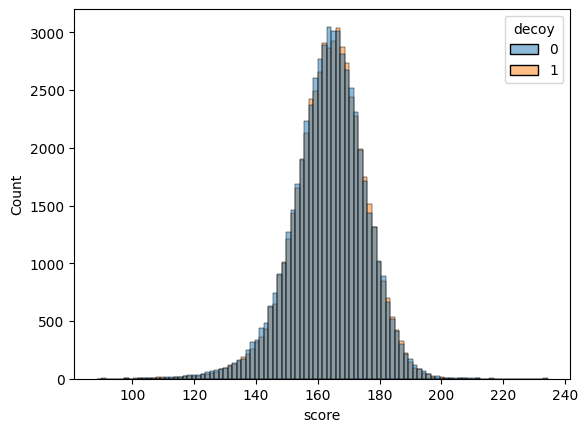

In [327]:
workflow.start_of_epoch(0)
fedf, frdf = workflow.extract_batch(workflow.calibration_df)

In [328]:
workflow.fdr_manager.classifier_store

{'fa9945ae23db872d': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x149932cd7e10>,
 '715e351002075dbf': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x14996cb7e310>,
 'ef18ae0c811f6ae2': <alphadia.fdrexperimental.BinaryClassifierLegacyNewBatching at 0x14996cb7e310>}

10:44:23.984001 INFO: performing precursor FDR with 47 features
10:44:23.985276 INFO: Decoy channel: -1
10:44:23.986070 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 149/149 [00:00<00:00, 14209.25it/s]
10:44:26.052393 INFO: Test AUC: 0.600
10:44:26.053641 INFO: Train AUC: 0.615
10:44:26.054656 INFO: AUC difference: 2.42%


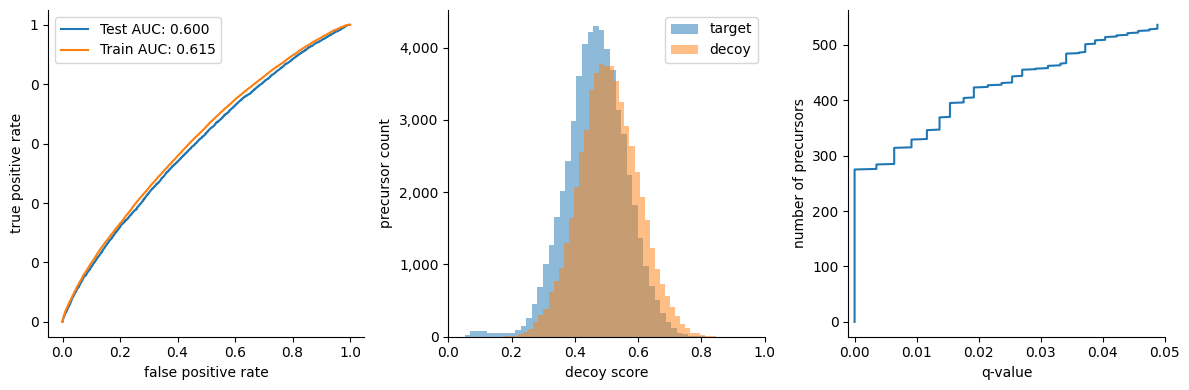

Storing classifier: 715e351002075dbf


In [329]:
prdf = workflow.fdr_correction(fedf, frdf)





In [330]:
sum(prdf.qval < 0.01)

330

In [286]:
np.sum(workflow.final_precursor_df.qval<0.01)

727

In [257]:
sorted_final_features_df = workflow.final_features_df.sort_values(
    by=["elution_group_idx", "base_width_rt"]
)

In [254]:
workflow.temp_feature_df.sort_values(by=["elution_group_idx", "base_width_rt"])

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,genes,mods,i_1,rt_library,flat_frag_stop_idx,i_3,delta_rt,n_K,n_R,n_P
1,0.0,10.142273,527.551697,0.000001,3.417266e+08,3.417266e+08,6.841307e+08,2.462184e+08,-29.643946,29.643946,...,TT21B_HUMAN,Carbamidomethyl@C,0.313971,554.237549,20690821,0.042427,-26.685852,0,1,0
0,0.0,14.636658,530.906494,0.000001,5.066205e+08,5.066205e+08,1.024421e+09,3.602979e+08,-25.807425,25.807425,...,TT21B_HUMAN,Carbamidomethyl@C,0.313971,554.237549,196,0.042427,-23.331055,0,1,0
2,0.0,12.294983,457.376373,0.000001,1.285461e+08,1.285461e+08,1.931904e+09,4.879394e+08,39.956871,39.956871,...,TANC1_HUMAN,,0.306749,441.716125,304,0.057005,15.660248,1,0,0
3,0.0,12.615784,317.329987,0.000001,1.293429e+08,1.293429e+08,6.202722e+09,1.569012e+09,4.911812,4.911812,...,TANC1_HUMAN,,0.306749,441.716125,20690929,0.057005,-124.386139,1,0,0
5,0.0,10.148743,443.875153,0.000001,1.077157e+09,1.077157e+09,1.640768e+09,7.276073e+08,4.742783,4.742783,...,DSRAD_HUMAN,,0.324788,333.236328,20691036,0.027526,110.638824,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237632,0.0,16.302063,777.452515,0.000001,9.432587e+07,6.279192e+07,1.616049e+08,4.379094e+07,16.538832,16.538832,...,WDR59_YEAST,,0.338304,636.964600,20690277,0.160036,140.487915,0,1,0
237634,0.0,10.660828,655.085571,0.000001,3.290415e+06,1.042172e+08,1.239358e+08,3.880046e+07,10.560783,10.560783,...,S35F2_HUMAN,Oxidation@M;Carbamidomethyl@C,0.320050,644.862183,20690313,0.192457,10.223389,0,1,1
237635,0.0,17.140472,514.940674,0.000001,0.000000e+00,1.622345e+09,2.851641e+09,8.786964e+08,0.417127,0.417127,...,S35F2_HUMAN,Oxidation@M;Carbamidomethyl@C,0.320050,644.862183,41372253,0.192457,-129.921509,0,1,1
237637,0.0,11.355225,805.171265,0.000001,2.372931e+08,2.668186e+07,2.813232e+08,6.042792e+07,-1.457267,1.457267,...,NEPI_ECOLI;NEPI_ECOBW,Oxidation@M,0.316749,645.009033,41372313,0.194687,160.162231,0,1,1


In [185]:
np.all(np.sort(workflow.final_features_df.elution_group_idx) == np.sort(workflow.temp_feature_df.elution_group_idx))

True

10:02:28.426319 INFO: performing precursor FDR with 47 features
10:02:28.427644 INFO: Decoy channel: -1
10:02:28.429635 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 150/150 [00:00<00:00, 14289.67it/s]
10:02:32.823686 INFO: Test AUC: 0.610
10:02:32.824890 INFO: Train AUC: 0.624
10:02:32.825735 INFO: AUC difference: 2.36%


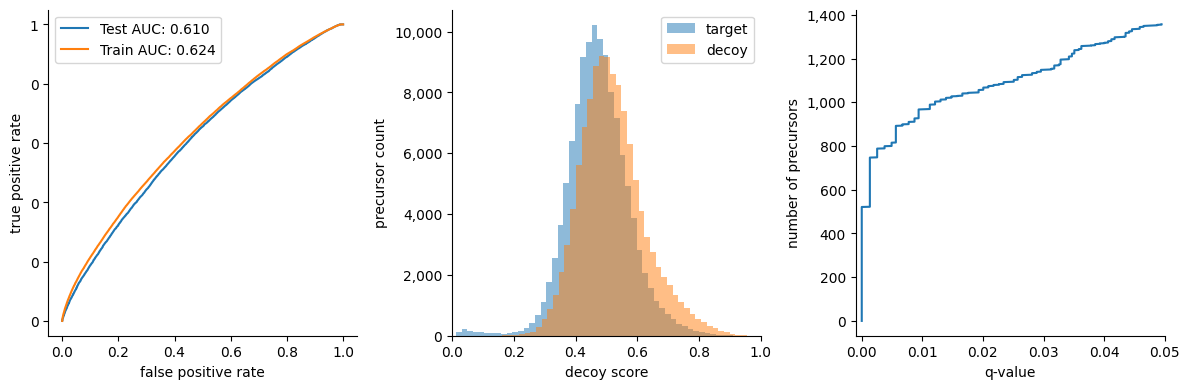

Storing classifier: 715e351002075dbf


In [264]:
final_test_precursor_df = workflow.fdr_correction(workflow.final_features_df, workflow.final_fragments_df)


10:02:16.307572 INFO: performing precursor FDR with 47 features
10:02:16.308953 INFO: Decoy channel: -1
10:02:16.309844 INFO: Competetive: True


Using classifier: 715e351002075dbf


100%|██████████| 150/150 [00:00<00:00, 14291.29it/s]
10:02:20.642911 INFO: Test AUC: 0.600
10:02:20.644148 INFO: Train AUC: 0.622
10:02:20.644973 INFO: AUC difference: 3.39%


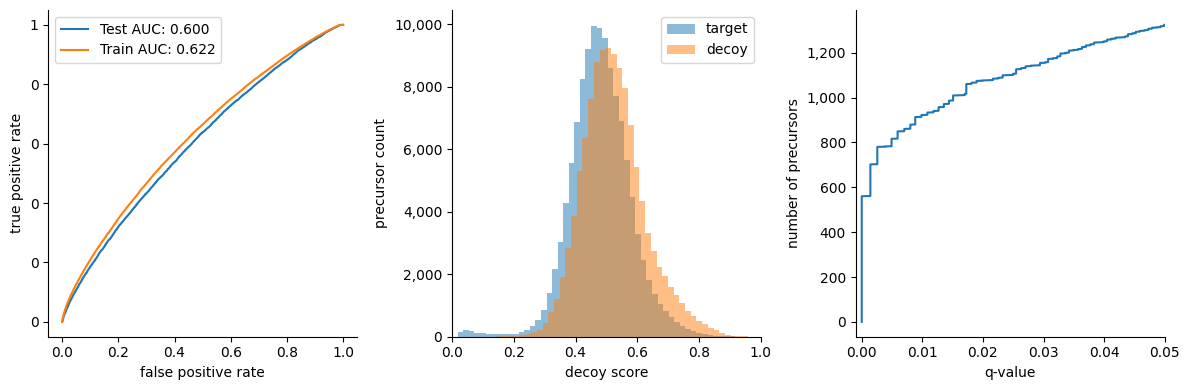

Storing classifier: 715e351002075dbf


In [262]:
temp_test_precursor_df = workflow.fdr_correction(workflow.temp_feature_df, workflow.temp_fragment_df)

In [265]:
sum(np.sort(final_test_precursor_df.qval) < 0.01)

968

In [263]:
sum(np.sort(temp_test_precursor_df.qval) < 0.01)

923

In [179]:
workflow.temp_feature_df.sort_values('genes')

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,genes,mods,i_1,rt_library,flat_frag_stop_idx,i_3,delta_rt,n_K,n_R,n_P
155654,0.0,10.236755,544.622742,0.000001,1.614133e+07,8.941484e+08,9.241640e+08,3.253076e+08,47.029781,47.029781,...,1433B_HUMAN,,0.354684,562.882996,34102696,0.107161,-18.260254,0,0,0
155653,0.0,17.156189,547.935852,0.000001,5.191182e+07,9.153859e+08,9.882124e+08,3.455097e+08,53.228767,53.228767,...,1433B_HUMAN,,0.354684,562.882996,13420648,0.107161,-14.947144,0,0,0
167144,0.0,13.039978,645.539490,0.000001,8.166363e+08,7.902125e+08,2.145579e+09,6.557491e+08,46.315624,46.315624,...,1433E_HUMAN,Oxidation@M,0.347073,517.409302,35104653,0.108841,128.130188,1,0,0
167143,0.0,12.341827,453.970154,0.000001,2.944575e+09,2.074142e+09,5.892857e+09,1.853870e+09,46.633430,46.633430,...,1433E_HUMAN,Oxidation@M,0.347073,517.409302,14422629,0.108841,-63.439148,1,0,0
161151,0.0,10.222351,493.467407,0.000001,1.138095e+08,1.413931e+08,5.132059e+08,1.437730e+08,1.959882,1.959882,...,1433F_HUMAN,,0.356651,562.019287,34595243,0.091136,-68.551880,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45966,0.0,10.085876,442.735535,0.000001,4.776859e+09,4.776859e+09,9.082584e+09,3.491091e+09,48.920506,48.920506,...,ZZZ3_HUMAN,Carbamidomethyl@C;Carbamidomethyl@C,0.294889,460.749695,24432312,0.052212,-18.014160,1,0,0
15728,0.0,10.083649,358.444183,0.000001,2.262098e+08,2.262098e+08,1.393781e+09,3.994116e+08,-1.769512,1.769512,...,ZZZ3_HUMAN,,0.285992,411.202271,22043969,0.015973,-52.758087,0,1,0
10233,0.0,10.253906,350.515564,0.000001,2.295085e+09,2.295085e+09,3.643436e+09,1.368312e+09,11.686883,11.686883,...,ZZZ3_HUMAN,Carbamidomethyl@C;Carbamidomethyl@C,0.323284,463.846802,913768,0.072266,-113.331238,0,1,1
98162,0.0,12.841064,616.441650,0.000001,1.593164e+08,1.593164e+08,2.946182e+08,1.136264e+08,-68.414795,68.414795,...,ZZZ3_HUMAN,,0.345021,574.615356,8289424,0.041419,41.826294,0,1,0


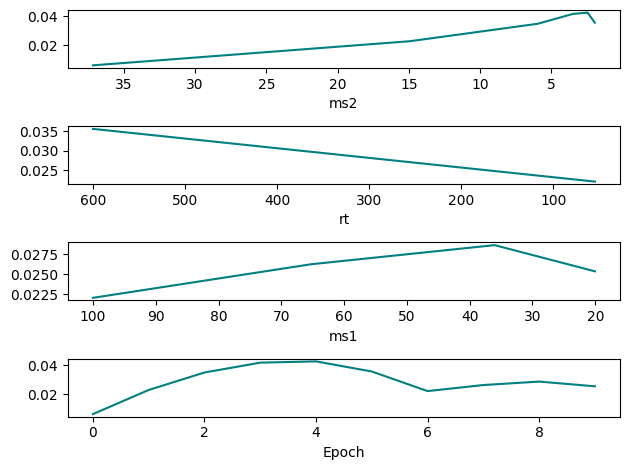

In [78]:
fig, ax = plt.subplots(4,1)

ax[0].plot(workflow.ms2_list[:6], workflow.precursor_proportion[:6], c='teal', label='Calibration Data')
ax[0].set_xlabel('ms2')
ax[0].invert_xaxis()
ax[1].plot(workflow.rt_list[5:7], workflow.precursor_proportion[5:7], c='teal', label='Calibration Data')
ax[1].set_xlabel('rt')
ax[1].invert_xaxis()
ax[2].plot(workflow.ms1_list[6:], workflow.precursor_proportion[6:], c='teal', label='Calibration Data')
ax[2].set_xlabel('ms1')
ax[2].invert_xaxis()
ax[3].plot(np.arange(len(workflow.precursor_proportion)), workflow.precursor_proportion, c='teal', label='Calibration Data')
ax[3].set_xlabel('Epoch')
plt.tight_layout()
#plt.savefig(f'{OUTPUT_FOLDER}debugging/proportion_ms2_rt_ms1_calibration.png', dpi=300)
plt.show()

In [76]:
''.join(['a', 'b', 'c'])

'abc'

In [286]:
plotting_df = pd.DataFrame(workflow.precursor_df_list)
plotting_df['proportion'] = workflow.calib_test_proportion
plotting_df = plotting_df / plotting_df.max(axis=0)
plotting_df = plotting_df / plotting_df.max(axis=0)  # To cope with negative columns
plotting_df['rt'] = workflow.rt_list
plotting_df_tidy = plotting_df.melt(id_vars=['rt'])

In [169]:
import plotly.express as px

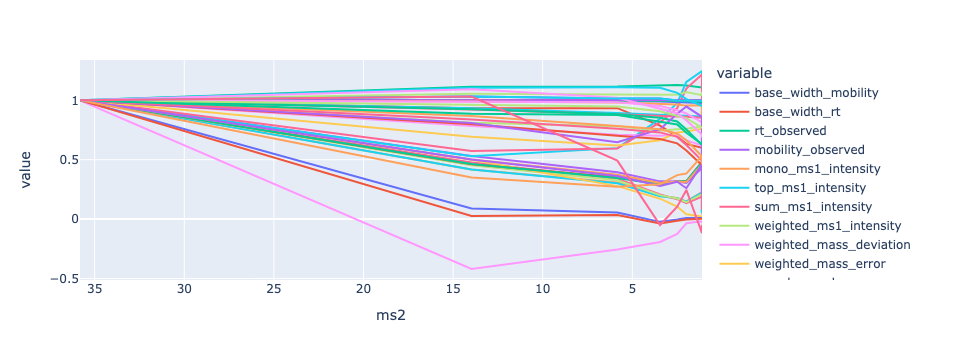

In [203]:
# Create the Plotly figure
fig = px.line(plotting_df_tidy, x='ms2', y='value', color='variable')

# Reverse the x-axis
fig.update_layout(xaxis=dict(autorange='reversed'))

# Show the plot
fig.show()

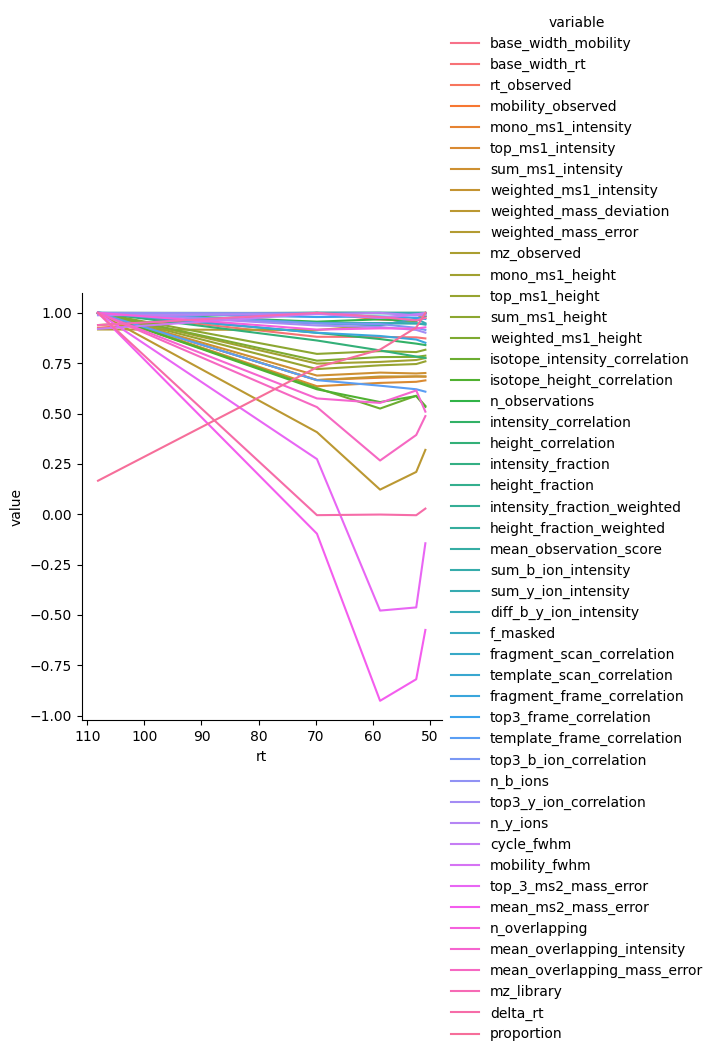

In [285]:
import seaborn as sns
g = sns.relplot(plotting_df_tidy, kind='line', x='rt', y='value', hue='variable', ax=ax1)
g.set(xlim=g.ax.get_xlim()[::-1])
plt.show()

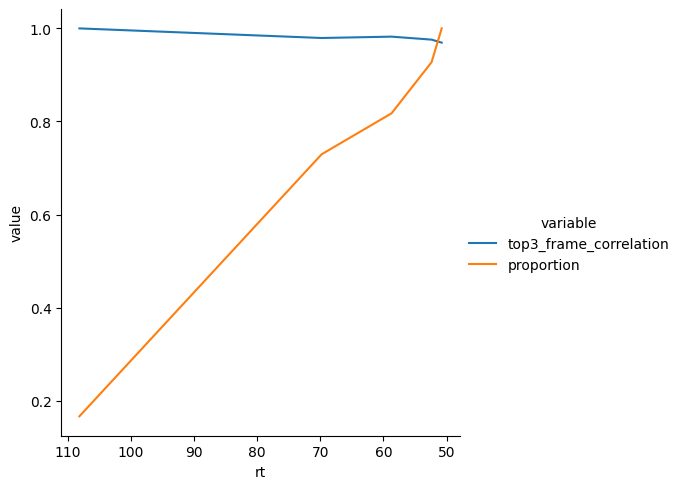

In [293]:
g = sns.relplot(plotting_df_tidy[plotting_df_tidy['variable'].isin(['top3_frame_correlation', 'proportion'])], kind='line', x='rt', y='value', hue='variable')
g.set(xlim=g.ax.get_xlim()[::-1])
#plt.savefig(f'{OUTPUT_FOLDER}debugging/proportion_of_max_rt_calibration.png', dpi=300)
plt.show()

In [197]:
y = plotting_df['proportion']

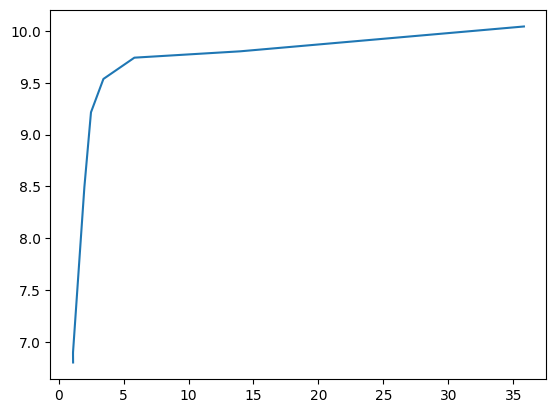

In [198]:
plt.plot(plotting_df['ms2'], y)
plt.show()

0:46:18.222662 INFO: calibration group: precursor, predicting mz
0:46:18.699327 INFO: calibration group: precursor, predicting rt
0:46:19.212572 INFO: calibration group: fragment, predicting mz
0:46:21.199798 PROGRESS: Extracting batch of 481467 precursors
0:46:22.166090 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:46:22.167055 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:46:22.168246 INFO: FWHM in RT is 3.06 seconds, sigma is 0.42
0:46:22.168897 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:46:22.180865 INFO: Starting candidate selection
100%|██████████| 481467/481467 [03:04<00:00, 2611.28it/s]
0:49:38.518982 INFO: Applying score cutoff of 41.38192577362061
0:49:39.792369 INFO: Removed 624002 precursors with score below cutoff
0:49:43.388250 INFO: Starting candidate scoring
100%|██████████| 1000/1000 [01:30<00:00, 11.06it/s]
0:51:20.960183 INFO: Finished candidate processing
0:51:20.986615 INFO: Collecting candidate features
0:51:41.5

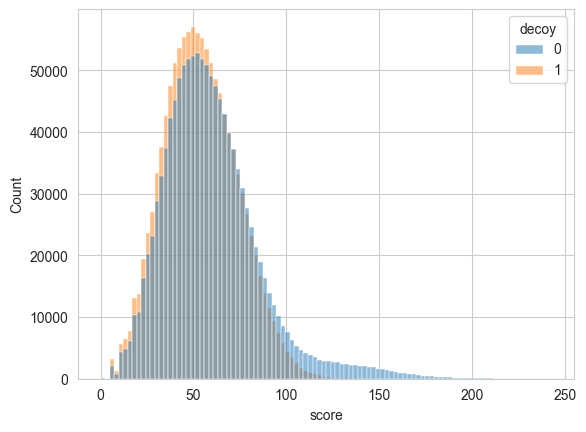

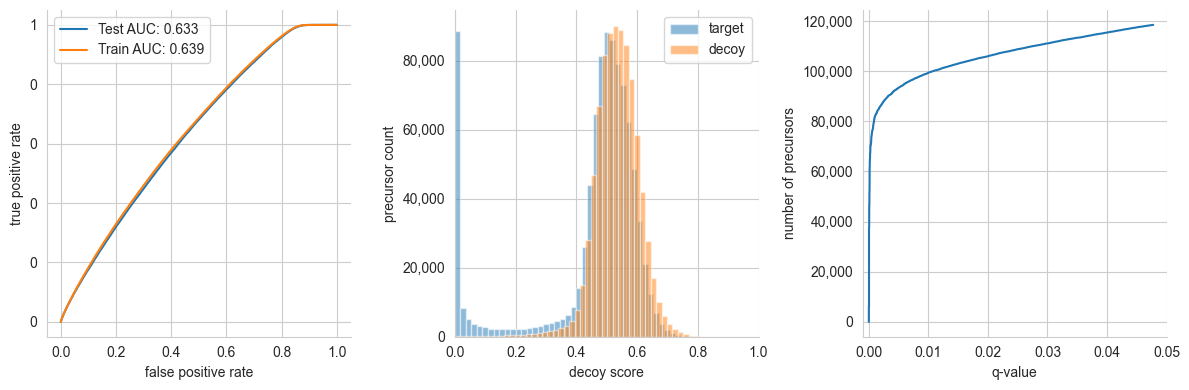

0:53:50.416393 INFO: Removing fragments below FDR threshold
0:53:52.505206 PROGRESS: ============================= Precursor FDR =============================
0:53:52.520319 PROGRESS: Total precursors accumulated: 99,339
0:53:52.521444 PROGRESS: Target precursors: 98,356 (99.01%)
0:53:52.522378 PROGRESS: Decoy precursors: 983 (0.99%)
0:53:52.523137 PROGRESS: 
0:53:52.523748 PROGRESS: Precursor Summary:
0:53:52.596824 PROGRESS: Channel   0:	 0.05 FDR: 98,356; 0.01 FDR: 98,356; 0.001 FDR: 81,618
0:53:52.597826 PROGRESS: 
0:53:52.598484 PROGRESS: Protein Summary:
0:53:52.705212 PROGRESS: Channel   0:	 0.05 FDR: 10,314; 0.01 FDR: 10,314; 0.001 FDR: 9,346
0:53:52.752980 PROGRESS: =========================================================================


(        base_width_mobility  base_width_rt  rt_observed  mobility_observed  \
 71337                   0.0      23.299622   679.788635           0.000001   
 92122                   0.0      20.210022   873.802917           0.000001   
 98268                   0.0      35.635681   796.254944           0.000001   
 26874                   0.0      29.484314   693.778687           0.000001   
 81602                   0.0      20.201294   484.358032           0.000001   
 ...                     ...            ...          ...                ...   
 1300                    0.0      10.838318   797.801331           0.000001   
 100804                  0.0      10.822876   588.340332           0.000001   
 77650                   0.0      13.951904   689.128296           0.000001   
 55103                   0.0      10.815002   654.966003           0.000001   
 110320                  0.0      17.057251   667.354980           0.000001   
 
         mono_ms1_intensity  top_ms1_intensity  su

In [12]:
workflow.extraction()

In [13]:
test_df = workflow.spectral_library.precursor_df.sample(1000)

In [14]:
from alphadia.peakgroup import search  # Changed this; original was from alphadia import hybridselection

config = search.HybridCandidateConfig()
config.update(workflow.config["selection_config"])
config.update(
    {
        "rt_tolerance": workflow.com.rt_error,
        "mobility_tolerance": workflow.com.mobility_error,
        "candidate_count": workflow.com.num_candidates,
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

extraction = search.HybridCandidateSelection(
    workflow.dia_data.jitclass(),
    test_df,
    workflow.spectral_library.fragment_df,
    config.jitclass(),
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
    fwhm_rt=workflow.optimization_manager.fwhm_rt,
    fwhm_mobility=workflow.optimization_manager.fwhm_mobility,
)
candidates_df = extraction(thread_count=workflow.config["general"]["thread_count"])

0:53:56.106614 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:53:56.107287 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:53:56.108294 INFO: FWHM in RT is 3.06 seconds, sigma is 0.42
0:53:56.108704 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:53:56.119786 INFO: Starting candidate selection


KeyError: 'mobility_calibrated'

In [ ]:
from alphadia import plexscoring

config = plexscoring.CandidateConfig()
config.update(workflow.config["scoring_config"])
config.update(
    {
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

candidate_scoring = plexscoring.CandidateScoring(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df,
    workflow.spectral_library._fragment_df,
    config=config,
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
)

features_df, fragments_df = candidate_scoring(
    candidates_df,
    thread_count=workflow.config["general"]["thread_count"],
)